In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv("aravinthan_sir(python_notes)/Iris.csv")

In [5]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
iris["Species"].str.split("-")[145][1]

'virginica'

In [27]:
sp = []
for i in range(len(iris)):
    sp.append(iris["Species"].str.split("-")[i][1])

In [32]:
iris["Species"] = pd.DataFrame(sp)

In [33]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [67]:
iris.Species.value_counts().to_frame().transpose()

,versicolor,virginica,setosa
Species,50,50,50


# TRAIN_TEST_SPLIT

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(iris.drop("Species",axis = 1),iris.Species,train_size = 0.7)

In [37]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
111,112,6.4,2.7,5.3,1.9
6,7,4.6,3.4,1.4,0.3
79,80,5.7,2.6,3.5,1.0
75,76,6.6,3.0,4.4,1.4
121,122,5.6,2.8,4.9,2.0


In [38]:
y_train.head()

111     virginica
6          setosa
79     versicolor
75     versicolor
121     virginica
Name: Species, dtype: object

In [39]:
x_test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
112,113,6.8,3.0,5.5,2.1
115,116,6.4,3.2,5.3,2.3
18,19,5.7,3.8,1.7,0.3
11,12,4.8,3.4,1.6,0.2
108,109,6.7,2.5,5.8,1.8


In [40]:
y_test.head()

112    virginica
115    virginica
18        setosa
11        setosa
108    virginica
Name: Species, dtype: object

# MACHING LEARNING ALGORITHMS(CLASSIFICATION)

# 1.LOGISTIC_REGRESSION

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logreg = LogisticRegression()

In [53]:
logreg

LogisticRegression()

In [54]:
logreg.fit(x_train,y_train)

C:\Users\aakas\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [50]:
logreg.predict(x_test)

array(['virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa'],
      dtype=object)

In [57]:
y_pred = pd.Series(logreg.predict(x_test))
y_test.reset_index(drop=True,inplace=True)
y_both = pd.concat([y_test,y_pred],axis=1)
y_both.columns = ["Species_Actual","Species_Predicted"]
y_both.head()

,Species_Actual,Species_Predicted
0,virginica,virginica
1,virginica,virginica
2,setosa,setosa
3,setosa,setosa
4,virginica,virginica


In [58]:
from sklearn import metrics

In [60]:
metrics.confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 16]], dtype=int64)

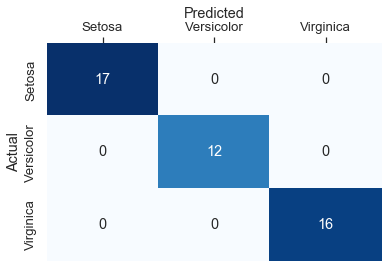

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,cmap="Blues",fmt="g",cbar=False)
ax.set_xlabel("Predicted");ax.set_ylabel("Actual")
ax.xaxis.set_label_position("top");ax.xaxis.tick_top()
ax.xaxis.set_ticklabels(["Setosa","Versicolor","Virginica"]);ax.yaxis.set_ticklabels(["Setosa","Versicolor","Virginica"],va = "center")
sns.set(font_scale=1.2)